In [2]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
dataset = pd.read_csv('new-york-city-airbnb-open-data/AB_NYC_2019.csv')

In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [6]:
dataset.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
dataset.duplicated().sum()

0

#### Removing unneeded attributes and null values

In [5]:
dataset.drop(['name', 'host_name', 'last_review', 'id'], axis=1, inplace=True)

In [6]:
dataset.fillna({'reviews_per_month' : 0}, inplace=True)

In [10]:
dataset.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [11]:
dataset.head(5)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [12]:
dataset.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#### We could see that the price and availability of listings hold largest difference.

#### Finding correlations between variables, we want to visualize all correlations.

Text(0.5, 1, 'Correlation Matrix of Attributes')

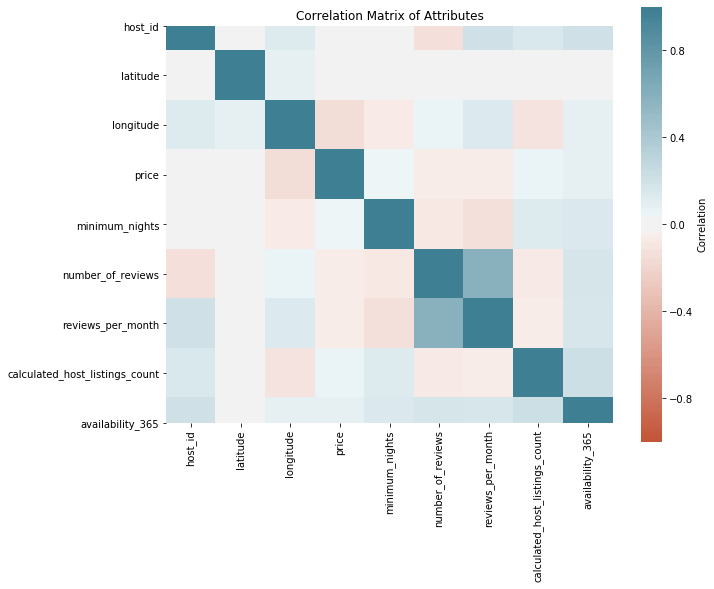

In [7]:
corr_matrix = dataset.corr()

plt.figure(figsize=(10, 8))
ax4 = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    cbar_kws={'label': 'Correlation'}) 

ax4.set_title('Correlation Matrix of Attributes')

## Based on a scatter_matrix plot containing all predictors, there was no strong evidence for collinearity amongst the predictors.  
### The correlation table shows that there is no strong relationship between price and other features. This indicates no feature needed to be taken out of data.

#### We also want to find correlation between the price and independent variables

In [14]:
corr_matrix["price"].sort_values(ascending=False)

price                             1.000000
availability_365                  0.081829
calculated_host_listings_count    0.057472
minimum_nights                    0.042799
latitude                          0.033939
host_id                           0.015309
number_of_reviews                -0.047954
reviews_per_month                -0.050564
longitude                        -0.150019
Name: price, dtype: float64

### Multicollinearity will help to measure the relationship between explanatory variables in multiple regression. If there is multicollinearity occurs, these highly related input variables should be eliminated from the model.

### In this kernel, multicollinearity will be control with Eigen vector values results.

In [8]:
multicollinearity, V=np.linalg.eig(corr_matrix)
multicollinearity

array([1.76198321, 0.31087346, 1.47359921, 1.18604437, 0.63577869,
       0.75188805, 1.01937041, 0.99402414, 0.86643844])

### None one of the eigenvalues of the correlation matrix is close to zero. It means that there is no multicollinearity exists in the data.

### Visualizing the data, drawing a simple geographical plot of prices below 500 dollars

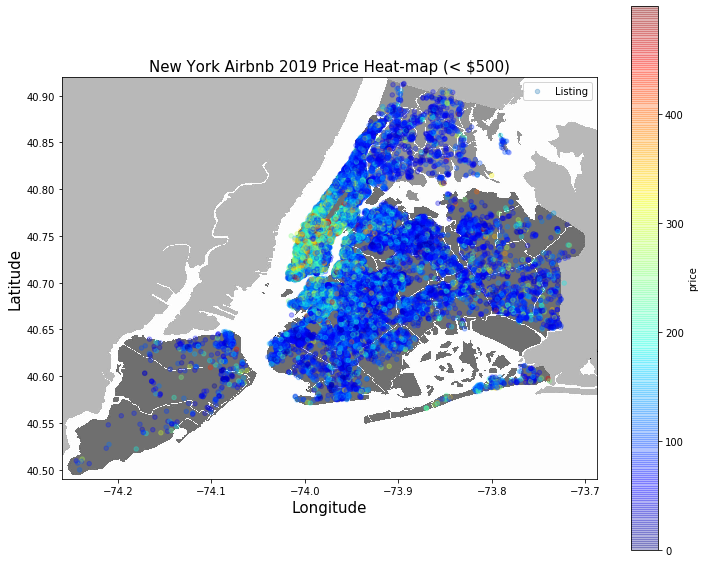

In [15]:
price_less_500 =dataset[dataset.price < 500]

plt.figure(figsize=(12,10))
nyc_img=plt.imread('new-york-city-airbnb-open-data/New_York_City_.png', 0)
plt.imshow(nyc_img,zorder=0,extent=[-74.26, -73.687, 40.49,40.92])
ax=plt.gca()
price_less_500.plot(kind='scatter', x='longitude', y='latitude', label='Listing', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.3)
plt.xlabel('Longitude', size=15)
plt.ylabel('Latitude', size=15)
plt.title('New York Airbnb 2019 Price Heat-map (< $500)', size=15)
plt.show()

#### Drawing the geographical plot of neighborhood groups

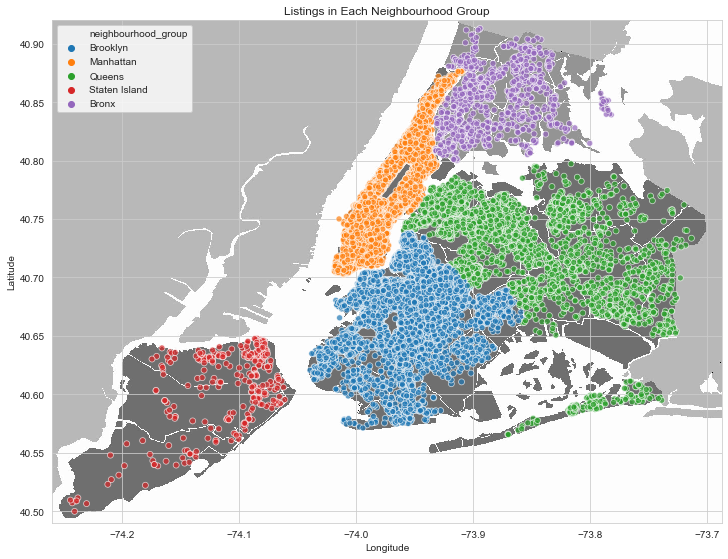

In [16]:
plt.figure(figsize=(12,10))
sns.set_style("whitegrid")
plt.imshow(nyc_img,zorder=0,extent=[-74.26, -73.687, 40.49,40.92])
ax=plt.gca()
ax1 = sns.scatterplot(x='longitude', y='latitude', data=dataset, hue='neighbourhood_group', alpha=0.7)
ax1.set(xlabel='Longitude', ylabel='Latitude', title='Listings in Each Neighbourhood Group')
plt.show()

#### Distribution of prices in neighbourhood groups

(0, 500)

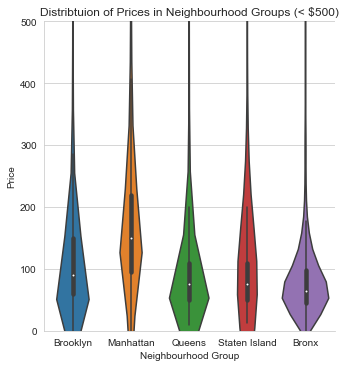

In [17]:
ax5 = sns.catplot(x="neighbourhood_group", y="price", kind="violin", data=dataset)
ax5.set(xlabel='Neighbourhood Group', ylabel='Price', title='Distribtuion of Prices in Neighbourhood Groups (< $500)')
plt.ylim(0, 500)

(0, 500)

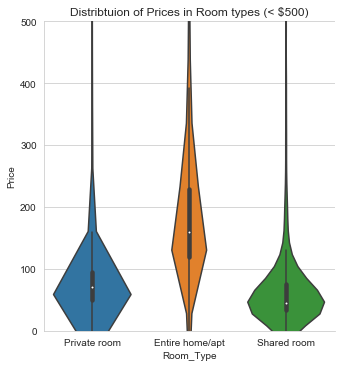

In [18]:
ax5 = sns.catplot(x="room_type", y="price", kind="violin", data=dataset)
ax5.set(xlabel='Room_Type', ylabel='Price', title='Distribtuion of Prices in Room types (< $500)')
plt.ylim(0, 500)

Text(0.5, 1.0, 'Neighbourhood Group')

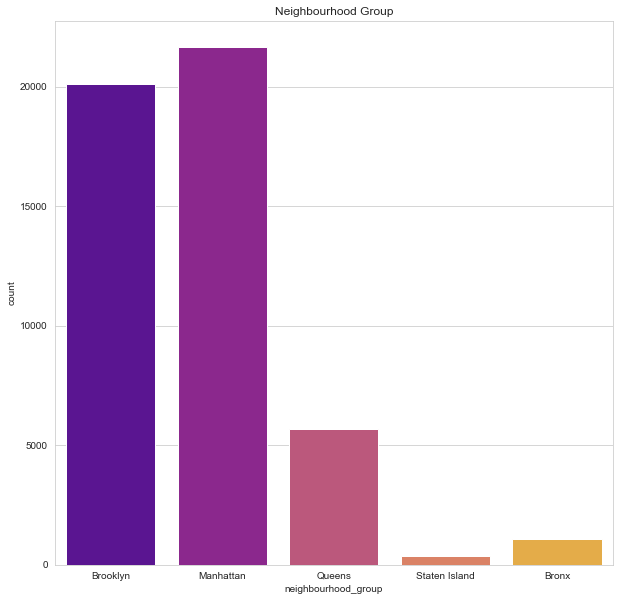

In [19]:
sns.countplot(dataset['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

Text(0.5, 1.0, 'Room type')

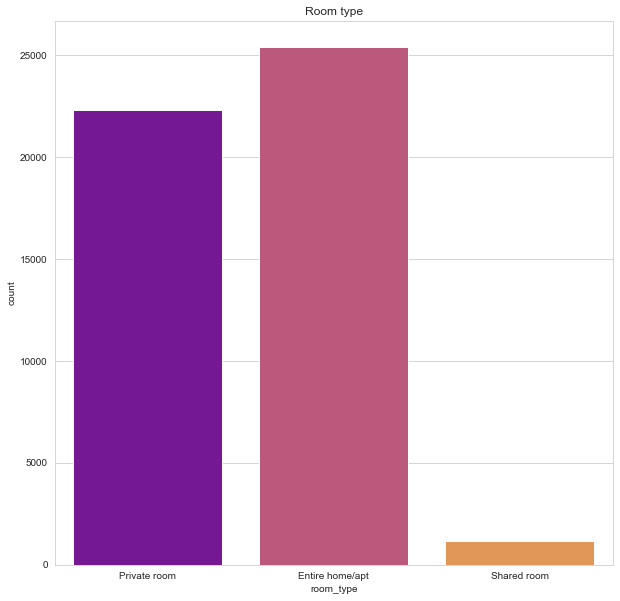

In [20]:
sns.countplot(dataset['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Room type')